# Recommender System

## ASL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#  从指定路径文件中加载数据
def load_data(path):
    rating_mat = np.zeros((943, 1682))     # 初始化评分矩阵
    f = open(path)
    for line in f.readlines():
        nums = line.split("\t")                       # 按制表符划分
        nums = [int(x) for x in nums]                 # 转化为数字
        rating_mat[nums[0]-1][nums[1]-1] = nums[2]
    f.close()
    return rating_mat
    
    

In [2]:
#  固定 Q 更新 P 
def gradient(P, Q, R, λ):
    row = P.shape[0]
    for u in range(row):
        b = R[u] != 0
        n = R[u].sum()
        P[u] = np.linalg.pinv(Q[b].T.dot(Q[b]) + λ).dot(Q.T.dot(R[u].reshape(1,-1).T)).ravel()
    return P

In [3]:
# 计算均方根误差
def Loss(P, Q, R):
    b = R != 0
    loss = np.sqrt(((R[b] - (P.dot(Q.T))[b])** 2).mean())
    return loss

In [4]:
# 交替最小二乘
def ALS(R_train, R_val):
    K = 20             # 潜在特征数
    λ = 149011611938476.56         # 正则化参数
    iterations = 20    # 训练轮数
    loss_train = []
    loss_val = []
    n_user, n_item = R_train.shape
    np.random.normal
    P = np.random.normal(0,0.1,(n_user, K))
    Q = np.random.normal(0,0.1,(n_item, K))
    for i in range(iterations):
        P = gradient(P, Q, R_train, λ)
        Q = gradient(Q, P, R_train.T, λ)
        loss_t = Loss(P, Q, R_train)
        loss_train.append(loss_t)
        loss_v = Loss(P, Q, R_val)
        loss_val.append(loss_v)
    return loss_train,loss_val

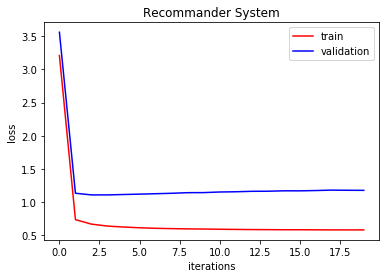

In [5]:
R_train = load_data("ml-100k/u2.base")
R_val = load_data("ml-100k/u2.test")
loss_train, loss_val = ALS(R_train, R_val)
x = len(loss_train)
plt.figure()
plt.title("Recommander System")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.plot(range(x), loss_train, "r",label="train")
plt.plot(range(x), loss_val, "b",label="validation")
plt.legend(loc="upper right")
plt.show()

## SGD

epochs 10000validation loss 2.67737080127
epochs 20000validation loss 1.03943060803
epochs 30000validation loss 0.81448075984
epochs 40000validation loss 0.821444543243
epochs 50000validation loss 0.778736563257
epochs 60000validation loss 0.759439571911
epochs 70000validation loss 0.749441198382
epochs 80000validation loss 0.757728676174
epochs 90000validation loss 0.720691953151
epochs 100000validation loss 0.750757005443


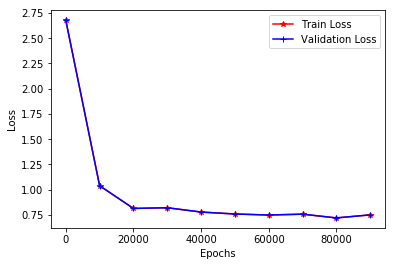

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load data
def load_data():
    #load train data
    for i in range(5):
        #set the file name
        file_name="ml-100k/u%d_base.csv"%(i+1)
        #read csv file
        base=pd.read_csv(file_name,header=None)
        #extract the first three columns
        base=base.iloc[:,:3]
        #transform into array
        base=np.array(base)
        #if i=0,initialize a container
        if i==0:
            train_data=base
            continue
        #else put the data into the container
        train_data=np.vstack((train_data,base))
    
    #load validation data
    for i in range(5):
        #set the file name
        file_name="ml-100k/u%d_test.csv"%(i+1)
        #read csv file
        base=pd.read_csv(file_name,header=None)
        #extract the first three columns
        base=base.iloc[:,:3]
        #transform into array
        base=np.array(base)
        #if i=0,initialize a container
        if i==0:
            validation_data=base
            continue
        #else put the data into the container
        validation_data=np.vstack((validation_data,base))
    
    return train_data,validation_data

#calculate the gradient
#return value is the gradient of p,lamb is the penalty factor,y_truth is the true value
def gradient(lamb,y_truth,p,q):
    #calculate the predict
    y_pred=np.dot(p,q.T)
    #get the gradient
    grad=-(y_truth-y_pred)*q+lamb*p
    #return the gradient
    return grad
    
#calculate the loss
def loss(rate_matrix,validation_data):
    #initialize the loss
    square_error=0
    #sum square error of each sample
    for i in range(len(validation_data)):
        #get the row index
        row_index=validation_data[i,0]-1
        #get the column index
        column_index=validation_data[i,1]-1
        #calculate the error
        error=((rate_matrix[row_index,column_index]-validation_data[i,2])**2)/2
        #sum the error
        square_error=square_error+error
    
    return square_error/len(validation_data)
    
#load experimental data
train_data,validation_data=load_data()

#initialize the hyper-parameters
#set the number of epochs
epochs=100000
#set the number of hidden features
K=20
#set the learning rate
learning_rate=0.1
#set the penalty factor
lamb=0.5
#initialize the user factor matrix
user_factor=np.random.normal(0,0.1,(943,K))
#initialize the item factor matrix
item_factor=np.random.normal(0,0.1,(1682,K))

#initialize the container for error
train_losses=[]
validation_losses=[]

#optimize the model using stochastic gradient descent
for i in range(epochs):
    #generate a random index of train sample
    sample_index=np.random.randint(0,400000)
    #get the row index and the column index
    row_index=train_data[sample_index,0]-1
    column_index=train_data[sample_index,1]-1
    #get the true rate
    y_truth=train_data[sample_index,2]
    
    #get the gradient of user factor matrix
    grad_user_factor=gradient(lamb,y_truth,user_factor[row_index],item_factor[column_index])
    #get the gradient of item factor matrix
    grad_item_factor=gradient(lamb,y_truth,item_factor[column_index],user_factor[row_index])
    #update the user factor matrix
    user_factor[row_index]=user_factor[row_index]-learning_rate*grad_user_factor
    #update the item factor matrix
    item_factor[column_index]=item_factor[column_index]-learning_rate*grad_item_factor
    
    #log every 10000 epochs
    if(i%10000==9999):
        #calculate the rate matrix
        temp_rate_matrix=np.dot(user_factor,item_factor.T)
        #get the train loss and the validation loss
        train_loss=loss(temp_rate_matrix,train_data)
        validation_loss=loss(temp_rate_matrix,validation_data)
        #put the error into the container
        train_losses.append(train_loss)
        validation_losses.append(validation_loss)
        #print the loss
        print("epochs "+str(i+1)+"validation loss "+str(validation_loss))

#draw graph of validation loss
x_axis=np.arange(len(train_losses))*10000
plt.plot(x_axis,train_losses,'r*-',label='Train Loss')
plt.plot(x_axis,validation_losses,'b+-',label='Validation Loss')
#set labels
plt.xlabel("Epochs")
plt.ylabel("Loss")
#show the legend
plt.legend()
#show the graph
plt.show()